# 3. Capstone Project - Feature Engineering

**Loading data and libralies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [2]:
# Original data set
original_df = pd.read_csv("./capstone_clean_heart_disease.csv")

# Train set : Under sampled data set and Over sampled data set
under_sampled_df = pd.read_csv("./under_sampled_df.csv")
over_sampled_df = pd.read_csv("./over_sampled_df.csv")
# Test set : Under sampled data set and Over sampled data set
test_sampled_df = pd.read_csv("./test_sampled_df.csv")
               
# Train set : SMOTE data set         
smote_df = pd.read_csv("./smote_df.csv")
# Test set : SMOTE data set  
test_smote_df = pd.read_csv("./test_smote_df.csv")

In [3]:
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma
0,No,16.60,Yes,No,3.0,30.0,No,Female,55-59,White,Yes,Very good,5.0,Yes
1,No,20.34,No,No,0.0,0.0,No,Female,80 or older,White,Yes,Very good,7.0,No
2,No,26.58,Yes,No,20.0,30.0,No,Male,65-69,White,Yes,Fair,8.0,Yes
3,No,24.21,No,No,0.0,0.0,No,Female,75-79,White,No,Good,6.0,No
4,No,23.71,No,No,28.0,0.0,Yes,Female,40-44,White,Yes,Very good,8.0,No


In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319073 non-null  object 
 1   BMI               319073 non-null  float64
 2   Smoking           319073 non-null  object 
 3   AlcoholDrinking   319073 non-null  object 
 4   PhysicalHealth    319073 non-null  float64
 5   MentalHealth      319073 non-null  float64
 6   DiffWalking       319073 non-null  object 
 7   Sex               319073 non-null  object 
 8   AgeCategory       319073 non-null  object 
 9   Race              319073 non-null  object 
 10  PhysicalActivity  319073 non-null  object 
 11  GenHealth         319073 non-null  object 
 12  SleepTime         319073 non-null  float64
 13  Asthma            319073 non-null  object 
dtypes: float64(4), object(10)
memory usage: 34.1+ MB


In [5]:
original_df.describe(include="all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma
count,319073,319073.000000,319073,319073,319073.000000,319073.000000,319073,319073,319073,319073,319073,319073,319073.000000,319073
unique,2,NaN,2,2,NaN,NaN,2,2,13,6,2,5,NaN,2
top,No,NaN,No,No,NaN,NaN,No,Female,65-69,White,Yes,Very good,NaN,No
freq,291804,NaN,187479,297340,NaN,NaN,275038,167368,34099,244825,247606,113770,NaN,276395
mean,NaN,28.264732,NaN,NaN,3.355618,3.887211,NaN,NaN,NaN,NaN,NaN,NaN,7.088594,NaN
std,NaN,6.167446,NaN,NaN,7.929974,7.940627,NaN,NaN,NaN,NaN,NaN,NaN,1.394768,NaN
min,NaN,12.020000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,24.030000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
50%,NaN,27.320000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN
75%,NaN,31.380000,NaN,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN


## Categorical-to-Numerical conversion

Most of the scikit-learn models require numerical inputs, so I'll convert data into numerical values. I already converted SMOTE data into numerical values, therefore, I'll use same process as I did for SMOTE data set.

### Categorical-to-Numerical : Original Data Set

In [6]:
original_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma'],
      dtype='object')

In [7]:
# List of columns with "Yes/No" values
yes_no_columns = ["HeartDisease", "Smoking", "AlcoholDrinking", "DiffWalking", "PhysicalActivity", "Asthma"]

In [8]:
# Convert "yes/no" into 1/0
for column in yes_no_columns:
    original_df[column] = original_df[column].map({"No":0, "Yes":1})

In [9]:
# Convet "Male/Female" into 1/0
# Male:1, Female:0
original_df["Sex"] = original_df["Sex"].replace({"Male":1, "Female":0})

AgeCategory column also categorical value, but I don't know the exact number of age. Therefore, I'll set the numbers as the smallest number in each range.

In [10]:
# Convert the values of AgeCategory column into number
original_df["AgeCategory"] = original_df["AgeCategory"].replace({'55-59':55, '80 or older':80, '65-69':65, '75-79':75, '40-44':40, '70-74':70,
                                                                               '60-64':60, '50-54':50, '45-49':45, '18-24':18, '35-39':35, '30-34':30, '25-29':25})

In [11]:
# Convert the values of GenHealth column into number:
# smaller number means bad health condition, larger number means good health condition
original_df["GenHealth"] = original_df["GenHealth"].replace({'Very good':3, 'Fair':1, 'Good':2, 'Poor':0, 'Excellent':4})

There are 6 values in Race column, and it can't be ordered. Since I don't have any other categorical columns in data set, I'll get dummies for this data set.

In [12]:
# Get dummies for Race column
original_df = pd.get_dummies(original_df)

In [13]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319073 non-null  int64  
 1   BMI                                  319073 non-null  float64
 2   Smoking                              319073 non-null  int64  
 3   AlcoholDrinking                      319073 non-null  int64  
 4   PhysicalHealth                       319073 non-null  float64
 5   MentalHealth                         319073 non-null  float64
 6   DiffWalking                          319073 non-null  int64  
 7   Sex                                  319073 non-null  int64  
 8   AgeCategory                          319073 non-null  int64  
 9   PhysicalActivity                     319073 non-null  int64  
 10  GenHealth                            319073 non-null  int64  
 11  SleepTime    

In [14]:
original_df.to_csv("capstone_clean_heart_disease_fe.csv", index=False)

### Categorical-to-Numerical : Under sampled data, Over sampled data, Test data for sampled

In [15]:
under_sampled_df.head()

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,HeartDisease
0,40.01,Yes,No,0.0,0.0,No,Male,65-69,White,No,Fair,8.0,No,No
1,25.75,No,No,5.0,0.0,No,Female,80 or older,White,Yes,Poor,6.0,No,No
2,24.80,No,No,0.0,0.0,No,Female,40-44,Black,No,Excellent,8.0,No,No
3,38.73,No,No,7.0,14.0,Yes,Female,60-64,Hispanic,No,Good,14.0,No,No
4,34.11,Yes,No,0.0,0.0,No,Male,70-74,Black,Yes,Very good,8.0,No,No


In [16]:
under_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38182 entries, 0 to 38181
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               38182 non-null  float64
 1   Smoking           38182 non-null  object 
 2   AlcoholDrinking   38182 non-null  object 
 3   PhysicalHealth    38182 non-null  float64
 4   MentalHealth      38182 non-null  float64
 5   DiffWalking       38182 non-null  object 
 6   Sex               38182 non-null  object 
 7   AgeCategory       38182 non-null  object 
 8   Race              38182 non-null  object 
 9   PhysicalActivity  38182 non-null  object 
 10  GenHealth         38182 non-null  object 
 11  SleepTime         38182 non-null  float64
 12  Asthma            38182 non-null  object 
 13  HeartDisease      38182 non-null  object 
dtypes: float64(4), object(10)
memory usage: 4.1+ MB


In [17]:
over_sampled_df.head()

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,HeartDisease
0,27.12,Yes,No,0.0,2.0,No,Male,35-39,White,No,Very good,8.0,No,No
1,30.23,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Good,7.0,No,No
2,32.55,No,No,0.0,0.0,No,Male,60-64,White,Yes,Very good,6.0,No,No
3,33.07,No,No,0.0,0.0,No,Female,55-59,Hispanic,Yes,Very good,6.0,No,No
4,23.06,No,No,0.0,0.0,No,Male,30-34,Black,Yes,Excellent,7.0,No,No


In [18]:
over_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408520 entries, 0 to 408519
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               408520 non-null  float64
 1   Smoking           408520 non-null  object 
 2   AlcoholDrinking   408520 non-null  object 
 3   PhysicalHealth    408520 non-null  float64
 4   MentalHealth      408520 non-null  float64
 5   DiffWalking       408520 non-null  object 
 6   Sex               408520 non-null  object 
 7   AgeCategory       408520 non-null  object 
 8   Race              408520 non-null  object 
 9   PhysicalActivity  408520 non-null  object 
 10  GenHealth         408520 non-null  object 
 11  SleepTime         408520 non-null  float64
 12  Asthma            408520 non-null  object 
 13  HeartDisease      408520 non-null  object 
dtypes: float64(4), object(10)
memory usage: 43.6+ MB


In [19]:
test_sampled_df.head()

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,HeartDisease
0,31.57,Yes,Yes,0.0,20.0,No,Male,60-64,White,Yes,Good,8.0,No,No
1,25.10,No,No,0.0,0.0,No,Male,70-74,White,Yes,Very good,7.0,No,No
2,22.63,No,Yes,0.0,0.0,No,Female,40-44,Black,Yes,Excellent,5.0,No,No
3,21.29,No,No,0.0,0.0,No,Male,65-69,White,Yes,Excellent,7.0,No,No
4,21.93,No,No,30.0,0.0,Yes,Male,70-74,Hispanic,No,Fair,4.0,No,No


In [20]:
test_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95722 entries, 0 to 95721
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               95722 non-null  float64
 1   Smoking           95722 non-null  object 
 2   AlcoholDrinking   95722 non-null  object 
 3   PhysicalHealth    95722 non-null  float64
 4   MentalHealth      95722 non-null  float64
 5   DiffWalking       95722 non-null  object 
 6   Sex               95722 non-null  object 
 7   AgeCategory       95722 non-null  object 
 8   Race              95722 non-null  object 
 9   PhysicalActivity  95722 non-null  object 
 10  GenHealth         95722 non-null  object 
 11  SleepTime         95722 non-null  float64
 12  Asthma            95722 non-null  object 
 13  HeartDisease      95722 non-null  object 
dtypes: float64(4), object(10)
memory usage: 10.2+ MB


In [21]:
# create a list for "for loop" below
data_set = [under_sampled_df, over_sampled_df, test_sampled_df]

In [22]:
# Convert "yes/no" into 1/0
for data in data_set:
    for column in yes_no_columns:
        data[column] = data[column].map({"No":0, "Yes":1})

In [23]:
# Convet "Male/Female" into 1/0
# Male:1, Female:0
for data in data_set:
    data["Sex"] = data["Sex"].replace({"Male":1, "Female":0})

In [24]:
# Convert the values of AgeCategory column into number
for data in data_set:
    data["AgeCategory"] = data["AgeCategory"].replace({'55-59':55, '80 or older':80, '65-69':65, '75-79':75, '40-44':40, '70-74':70,
                                                                                   '60-64':60, '50-54':50, '45-49':45, '18-24':18, '35-39':35, '30-34':30, '25-29':25})

In [25]:
# Convert the values of GenHealth column into number:
# smaller number means bad health condition, larger number means good health condition
for data in data_set:
    data["GenHealth"] = data["GenHealth"].replace({'Very good':3, 'Fair':1, 'Good':2, 'Poor':0, 'Excellent':4})

In [26]:
# Get dummies for Race column
under_sampled_df = pd.get_dummies(under_sampled_df)
over_sampled_df = pd.get_dummies(over_sampled_df)
test_sampled_df = pd.get_dummies(test_sampled_df)

In [27]:
under_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38182 entries, 0 to 38181
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BMI                                  38182 non-null  float64
 1   Smoking                              38182 non-null  int64  
 2   AlcoholDrinking                      38182 non-null  int64  
 3   PhysicalHealth                       38182 non-null  float64
 4   MentalHealth                         38182 non-null  float64
 5   DiffWalking                          38182 non-null  int64  
 6   Sex                                  38182 non-null  int64  
 7   AgeCategory                          38182 non-null  int64  
 8   PhysicalActivity                     38182 non-null  int64  
 9   GenHealth                            38182 non-null  int64  
 10  SleepTime                            38182 non-null  float64
 11  Asthma                      

In [28]:
over_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408520 entries, 0 to 408519
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  408520 non-null  float64
 1   Smoking                              408520 non-null  int64  
 2   AlcoholDrinking                      408520 non-null  int64  
 3   PhysicalHealth                       408520 non-null  float64
 4   MentalHealth                         408520 non-null  float64
 5   DiffWalking                          408520 non-null  int64  
 6   Sex                                  408520 non-null  int64  
 7   AgeCategory                          408520 non-null  int64  
 8   PhysicalActivity                     408520 non-null  int64  
 9   GenHealth                            408520 non-null  int64  
 10  SleepTime                            408520 non-null  float64
 11  Asthma       

In [29]:
test_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95722 entries, 0 to 95721
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BMI                                  95722 non-null  float64
 1   Smoking                              95722 non-null  int64  
 2   AlcoholDrinking                      95722 non-null  int64  
 3   PhysicalHealth                       95722 non-null  float64
 4   MentalHealth                         95722 non-null  float64
 5   DiffWalking                          95722 non-null  int64  
 6   Sex                                  95722 non-null  int64  
 7   AgeCategory                          95722 non-null  int64  
 8   PhysicalActivity                     95722 non-null  int64  
 9   GenHealth                            95722 non-null  int64  
 10  SleepTime                            95722 non-null  float64
 11  Asthma                      

In [30]:
under_sampled_df.to_csv("under_sampled_df_fe.csv", index=False)
over_sampled_df.to_csv("over_sampled_df_fe.csv", index=False)
test_sampled_df.to_csv("test_sampled_df_fe.csv", index=False)

### Check SMOTE DATA

SMOTE data is already converted into numerical values, therefore, I'll just check the dataset.

In [122]:
smote_df.head()

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,27.12,1,0,0.0,2.0,0,1,35,0,3,8.0,0,0,0,0,0,0,1,0
1,30.23,0,0,0.0,0.0,0,0,18,0,2,7.0,0,0,0,0,1,0,0,0
2,32.55,0,0,0.0,0.0,0,1,60,1,3,6.0,0,0,0,0,0,0,1,0
3,33.07,0,0,0.0,0.0,0,0,55,1,3,6.0,0,0,0,0,1,0,0,0
4,23.06,0,0,0.0,0.0,0,1,30,1,4,7.0,0,0,0,1,0,0,0,0


In [123]:
smote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408520 entries, 0 to 408519
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  408520 non-null  float64
 1   Smoking                              408520 non-null  int64  
 2   AlcoholDrinking                      408520 non-null  int64  
 3   PhysicalHealth                       408520 non-null  float64
 4   MentalHealth                         408520 non-null  float64
 5   DiffWalking                          408520 non-null  int64  
 6   Sex                                  408520 non-null  int64  
 7   AgeCategory                          408520 non-null  int64  
 8   PhysicalActivity                     408520 non-null  int64  
 9   GenHealth                            408520 non-null  int64  
 10  SleepTime                            408520 non-null  float64
 11  Asthma       

In [124]:
test_smote_df.head()

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,31.57,1,1,0.0,20.0,0,1,60,1,2,8.0,0,0,0,0,0,0,1,0
1,25.10,0,0,0.0,0.0,0,1,70,1,3,7.0,0,0,0,0,0,0,1,0
2,22.63,0,1,0.0,0.0,0,0,40,1,4,5.0,0,0,0,1,0,0,0,0
3,21.29,0,0,0.0,0.0,0,1,65,1,4,7.0,0,0,0,0,0,0,1,0
4,21.93,0,0,30.0,0.0,1,1,70,0,1,4.0,0,0,0,0,1,0,0,0


In [125]:
test_smote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95722 entries, 0 to 95721
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BMI                                  95722 non-null  float64
 1   Smoking                              95722 non-null  int64  
 2   AlcoholDrinking                      95722 non-null  int64  
 3   PhysicalHealth                       95722 non-null  float64
 4   MentalHealth                         95722 non-null  float64
 5   DiffWalking                          95722 non-null  int64  
 6   Sex                                  95722 non-null  int64  
 7   AgeCategory                          95722 non-null  int64  
 8   PhysicalActivity                     95722 non-null  int64  
 9   GenHealth                            95722 non-null  int64  
 10  SleepTime                            95722 non-null  float64
 11  Asthma                      

From the notebook "2. Capstone Project - Sampling imbalanced", I noticed there are some rows  with 0 value for all race columns. So I'll check which ways are better to treat those columns and rows. I'll try original smote_df, dropping all rows with 0 for all race columns, and consider those columns as other nationality and convert to Race_Other column into 1.

In [126]:
smote_df.head()

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,27.12,1,0,0.0,2.0,0,1,35,0,3,8.0,0,0,0,0,0,0,1,0
1,30.23,0,0,0.0,0.0,0,0,18,0,2,7.0,0,0,0,0,1,0,0,0
2,32.55,0,0,0.0,0.0,0,1,60,1,3,6.0,0,0,0,0,0,0,1,0
3,33.07,0,0,0.0,0.0,0,0,55,1,3,6.0,0,0,0,0,1,0,0,0
4,23.06,0,0,0.0,0.0,0,1,30,1,4,7.0,0,0,0,1,0,0,0,0


In [127]:
# Drop the rows with no races data
smote_df_drop_0 = smote_df.copy()
smote_df_drop_0 = smote_df_drop_0[(smote_df_drop_0["Race_American Indian/Alaskan Native"] != 0) | (smote_df_drop_0["Race_Asian"] != 0) | 
                                  (smote_df_drop_0["Race_Black"] != 0) | (smote_df_drop_0["Race_Hispanic"] != 0) | (smote_df_drop_0["Race_Other"] != 0) |
                                  (smote_df_drop_0["Race_White"] != 0)]

# Chech after dropping the rows 
smote_df_drop_0

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,27.120000,1,0,0.000000,2.0,0,1,35,0,3,8.000000,0,0,0,0,0,0,1,0
1,30.230000,0,0,0.000000,0.0,0,0,18,0,2,7.000000,0,0,0,0,1,0,0,0
2,32.550000,0,0,0.000000,0.0,0,1,60,1,3,6.000000,0,0,0,0,0,0,1,0
3,33.070000,0,0,0.000000,0.0,0,0,55,1,3,6.000000,0,0,0,0,1,0,0,0
4,23.060000,0,0,0.000000,0.0,0,1,30,1,4,7.000000,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408514,31.923998,0,0,20.140802,0.0,0,1,70,1,2,8.000000,0,0,0,0,0,0,1,1
408515,25.856492,0,0,8.427705,10.0,0,0,80,0,1,9.371082,0,0,0,0,0,0,1,1
408516,27.176702,0,0,0.000000,0.0,0,1,65,1,3,7.000000,0,0,0,0,0,0,1,1
408518,32.141741,1,0,2.000000,0.0,0,1,75,1,2,7.918155,0,0,0,0,0,0,1,1


In [128]:
# Convert Race_Other columns of the rows with no nationality data into 1
smote_df_to_other = smote_df.copy()
 # get all index with "No Race" data
convert_to_other_index = smote_df_to_other[(smote_df_to_other["Race_American Indian/Alaskan Native"] == 0) & (smote_df_to_other["Race_Asian"] == 0) & 
                                           (smote_df_to_other["Race_Black"] == 0) & (smote_df_to_other["Race_Hispanic"] == 0) & 
                                           (smote_df_to_other["Race_Other"] == 0) &(smote_df_to_other["Race_White"] == 0)].index

 # Replace "Race_Other" value into 1
smote_df_to_other.loc[convert_to_other_index, "Race_Other"] = 1

In [129]:
# Chech if there are no data with "No Race" after replacing
smote_df_to_other[(smote_df_to_other["Race_American Indian/Alaskan Native"] == 0) & (smote_df_to_other["Race_Asian"] == 0) & 
                                           (smote_df_to_other["Race_Black"] == 0) & (smote_df_to_other["Race_Hispanic"] == 0) & 
                                           (smote_df_to_other["Race_Other"] == 0) &(smote_df_to_other["Race_White"] == 0)]

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease


In [130]:
# Split data into train and test set
from sklearn.model_selection import train_test_split

# original smote
X = smote_df.drop(columns="HeartDisease")
y = smote_df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# dropped "No Race" rows
X1 = smote_df_drop_0.drop(columns="HeartDisease")
y1 = smote_df_drop_0["HeartDisease"]

X_train_drop_0, X_test_drop_0, y_train_drop_0, y_test_drop_0 = train_test_split(X1, y1, test_size = 0.3, random_state=42)

# converted "Race_Other" into 1
X2 = smote_df_to_other.drop(columns="HeartDisease")
y2 = smote_df_to_other["HeartDisease"]

X_train_to_other, X_test_to_other, y_train_to_other, y_test_to_other = train_test_split(X2, y2, test_size = 0.3, random_state=42)

In [131]:
# check the accuracy score: Original smote_df

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_scaled_train,y_train)

print("Original smote_df")
print(f"train score: {model.score(X_scaled_train,y_train)*100}")
print(f"test score: {model.score(X_scaled_test,y_test)*100}")

Original smote_df
train score: 80.98327062147683
test score: 80.92790234668233


In [132]:
# check the accuracy score: dropped "No Race" rows

scaler = StandardScaler()
scaler.fit(X_train_drop_0)
X_scaled_train = scaler.transform(X_train_drop_0)
X_scaled_test = scaler.transform(X_test_drop_0)
    
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_scaled_train,y_train_drop_0)

print("Dropped 0")
print(f"train score: {model.score(X_scaled_train,y_train_drop_0)*100}")
print(f"test score: {model.score(X_scaled_test,y_test_drop_0)*100}")

Dropped 0
train score: 79.1060070807506
test score: 78.84366460520638


In [133]:
# check the accuracy score: converted "Race_Other" into 1
scaler = StandardScaler()
scaler.fit(X_train_to_other)
X_scaled_train = scaler.transform(X_train_to_other)
X_scaled_test = scaler.transform(X_test_to_other)
    
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_scaled_train,y_train_to_other)

print("Converted to Other")
print(f"train score: {model.score(X_scaled_train,y_train_to_other)*100}")
print(f"test score: {model.score(X_scaled_test,y_test_to_other)*100}")

Converted to Other
train score: 79.83767187478145
test score: 79.77985573941709


From above, accuracy of original smote_df is the highest. Therefore, I'll keep useing original smote_df.

Now, I have data set as below.

|**Data Name**|**Number of Rows**|**Number of Colimns**|**Data Types**|
|--|--|--|--|
|**Train Set**| | | |
|Original data|319073 rows|19 columns|all numerical values|
|Under Sampled Data|38182 rows|19 columns|all numerical values|
|Over Sampled Data|408520 rows|19 columns|all numerical values|
|SMOTE Data|408520 rows|19 columns|all numerical values|
|**Test Set**| | | |
|Test Sampled Data|95722 rows|19 columns|all numerical values|
|Test SMOTE Data|95722 rows|19 columns|all numerical values|

## Feature Selection

Now all the data converted to numerical values. Next, I'll do feature selection. Feature selection should be carried out on a train set only, So I'll split the original data set then move to feature selection. For feature selecting, I'll use selectKBest, RFE, and RFECV.

In [134]:
# Split the original data set into train and test set
X = original_df.drop(columns="HeartDisease")
y = original_df["HeartDisease"]

from sklearn.model_selection import train_test_split

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size = 0.3, random_state=42)

In [135]:
# Split other data set into X and y
 # Under sampling: train set
X_train_under = under_sampled_df.drop(columns="HeartDisease")
y_train_under = under_sampled_df["HeartDisease"]

 # Over sampling: train set
X_train_over = over_sampled_df.drop(columns="HeartDisease")
y_train_over = over_sampled_df["HeartDisease"]

 # Under/over sampling: test set
X_test_sampled = test_sampled_df.drop(columns="HeartDisease")
y_test_sampled = test_sampled_df["HeartDisease"]

 # SMOTE: train set
X_train_smote = smote_df.drop(columns="HeartDisease")
y_train_smote = smote_df["HeartDisease"]

 # SMOTE: test set
X_test_smote = test_smote_df.drop(columns="HeartDisease")
y_test_smote = test_smote_df["HeartDisease"]

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression

### Logistic Regression : before feature selecting

I'll chech the accuracy score of all the datasets before reducing the features.

In [59]:
# Create logistic regression models with for loop
 # a list for "for loop"
X_train = [X_train_original, X_train_under, X_train_over, X_train_smote]
X_test = [X_test_original, X_test_sampled, X_test_sampled, X_test_smote]
y_train = [y_train_original, y_train_under, y_train_over,y_train_smote]
y_test = [y_test_original, y_test_sampled, y_test_sampled, y_test_smote]

 # put each train and test score in those lists
train_score = []
test_score = []

# for loop for logistic regression
for index in range(4):
    
    scaler = StandardScaler()
    scaler.fit(X_train[index])
    X_scaled_train = scaler.transform(X_train[index])
    X_scaled_test = scaler.transform(X_test[index])
    
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_scaled_train,y_train[index])
    
    train_score.append(model.score(X_scaled_train,y_train[index])*100)
    test_score.append(model.score(X_scaled_test,y_test[index])*100)

In [60]:
# compare the each scores
before_selection = pd.DataFrame((train_score, test_score), columns=["Original", "Under Sampled", "Over Sampled", "SMOTE"], 
                                index=["Train score", "Test score"])
before_selection

,Original,Under Sampled,Over Sampled,SMOTE
Train score,91.452915,75.787020,75.675365,80.968618
Test score,91.389649,73.322747,73.284094,77.891185


### SelectKBest

In [133]:
# SelectKBest
# Original data set

train_scores_original = []
test_scores_original = []

 # k range
ks = list(range(5,19))

scaler = StandardScaler()
scaler.fit(X_train_original)
X_scaled_train = scaler.transform(X_train_original)
X_scaled_test = scaler.transform(X_test_original)

for k in ks:
    
    my_KBest = SelectKBest(f_regression,k=k).fit(X_scaled_train,y_train_original)
    
    X_train_selected = my_KBest.transform(X_scaled_train)
    X_test_selected = my_KBest.transform(X_scaled_test)
    
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_selected,y_train_original)
    
    train_scores_original.append(model.score(X_train_selected,y_train_original))
    test_scores_original.append(model.score(X_test_selected,y_test_original))

In [134]:
# SelectKBest
# Under sampled data set

train_scores_under = []
test_scores_under = []

 # k range
ks = list(range(5,19))

scaler = StandardScaler()
scaler.fit(X_train_under)
X_scaled_train = scaler.transform(X_train_under)
X_scaled_test = scaler.transform(X_test_sampled)

for k in ks:
    
    my_KBest = SelectKBest(f_regression,k=k).fit(X_scaled_train,y_train_under)
    
    X_train_selected = my_KBest.transform(X_scaled_train)
    X_test_selected = my_KBest.transform(X_scaled_test)
    
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_selected,y_train_under)
     
    train_scores_under.append(model.score(X_train_selected,y_train_under))
    test_scores_under.append(model.score(X_test_selected,y_test_sampled))

In [135]:
# SelectKBest
# Over sampled data set

train_scores_over = []
test_scores_over = []

 # k range
ks = list(range(5,19))

scaler = StandardScaler()
scaler.fit(X_train_over)
X_scaled_train = scaler.transform(X_train_over)
X_scaled_test = scaler.transform(X_test_sampled)

for k in ks:
    
    my_KBest = SelectKBest(f_regression,k=k).fit(X_scaled_train,y_train_over)
    
    X_train_selected = my_KBest.transform(X_scaled_train)
    X_test_selected = my_KBest.transform(X_scaled_test)
    
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_selected,y_train_over)
    
    train_scores_over.append(model.score(X_train_selected,y_train_over))
    test_scores_over.append(model.score(X_test_selected,y_test_sampled))

In [136]:
# SelectKBest
# SMOTE data set

train_scores_smote = []
test_scores_smote = []

 # k range
ks = list(range(5,19))

scaler = StandardScaler()
scaler.fit(X_train_smote)
X_scaled_train = scaler.transform(X_train_smote)
X_scaled_test = scaler.transform(X_test_smote)

for k in ks:
    
    my_KBest = SelectKBest(f_regression,k=k).fit(X_scaled_train,y_train_smote)
    
    X_train_selected = my_KBest.transform(X_scaled_train)
    X_test_selected = my_KBest.transform(X_scaled_test)
    
    model = LogisticRegression(max_iter=1500, random_state=42)
    model.fit(X_train_selected,y_train_smote)
    
    train_scores_smote.append(model.score(X_train_selected,y_train_smote))
    test_scores_smote.append(model.score(X_test_selected,y_test_smote))

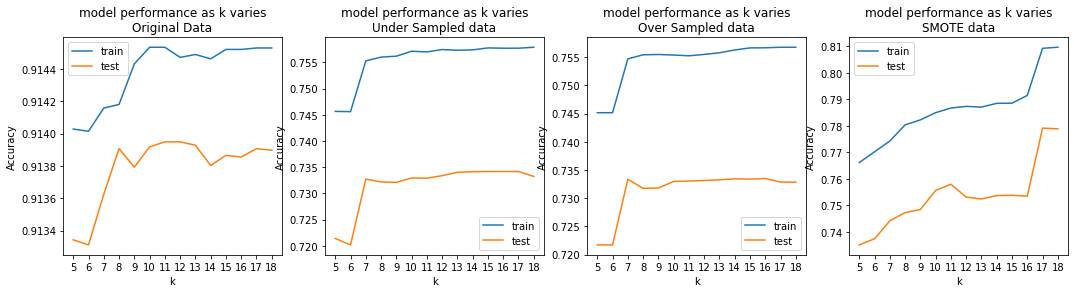

In [137]:
# Plots each train and test scores
plt.subplots(1, 4, figsize=(18,4))

 # original data plot
plt.subplot(1, 4, 1)
plt.plot(ks,train_scores_original,label = 'train')
plt.plot(ks,test_scores_original,label = 'test')
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("model performance as k varies\nOriginal Data")
plt.legend()

 # under sampled data plot
plt.subplot(1, 4, 2)
plt.plot(ks,train_scores_under,label = 'train')
plt.plot(ks,test_scores_under,label = 'test')
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("model performance as k varies\nUnder Sampled data")
plt.legend()

 # over sampled data plot
plt.subplot(1, 4, 3)
plt.plot(ks,train_scores_over,label = 'train')
plt.plot(ks,test_scores_over,label = 'test')
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("model performance as k varies\nOver Sampled data")
plt.legend()

 # SMOTE data plot
plt.subplot(1, 4, 4)
plt.plot(ks,train_scores_smote,label = 'train')
plt.plot(ks,test_scores_smote,label = 'test')
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("model performance as k varies\nSMOTE data")
plt.legend()

plt.show()

From above, I can see the great imporovement when k is 8 and accuracy goes lower or about the same after that for Original data. For under and over sampled data, there is a great improvement on k=7 and it's more like flat after that. For SMOTE data, the accuracy got improved on k=17. Therefore, I'll use k=8 for Original data, k=7 for Under and Over sampled data and k=17 for SMOTE data.

In [138]:
# SelectKBest: Original data final
scaler = StandardScaler()
scaler.fit(X_train_original)
X_scaled_train = scaler.transform(X_train_original)
X_scaled_test = scaler.transform(X_test_original)

KBest_original = SelectKBest(f_regression,k=8).fit(X_scaled_train,y_train_original)
    
X_train_selected = KBest_original.transform(X_scaled_train)
X_test_selected = KBest_original.transform(X_scaled_test)
    
model_original = LogisticRegression(max_iter=1000, random_state=42)
model_original.fit(X_train_selected,y_train_original)

train_score_or_kbest = model_original.score(X_train_selected,y_train_original)
test_score_or_kbest = model_original.score(X_test_selected,y_test_original)
    
print(f"k = 8 : {X_train_original.columns[KBest_original.get_support()]}")

k = 8 : Index(['BMI', 'Smoking', 'PhysicalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth'],
      dtype='object')


In [139]:
# SelectKBest: Under samoled data final
scaler = StandardScaler()
scaler.fit(X_train_under)
X_scaled_train = scaler.transform(X_train_under)
X_scaled_test = scaler.transform(X_test_sampled)

KBest_under = SelectKBest(f_regression,k=7).fit(X_scaled_train,y_train_under)
    
X_train_selected = KBest_under.transform(X_scaled_train)
X_test_selected = KBest_under.transform(X_scaled_test)
    
model_under = LogisticRegression(max_iter=1000, random_state=42)
model_under.fit(X_train_selected,y_train_under)

train_score_u_kbest = model_under.score(X_train_selected,y_train_under)
test_score_u_kbest = model_under.score(X_test_selected,y_test_sampled)
    
print(f"k = 7, {X_train_under.columns[KBest_under.get_support()]}")

k = 7, Index(['Smoking', 'PhysicalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth'],
      dtype='object')


In [140]:
# SelectKBest: Over samoled data final
scaler = StandardScaler()
scaler.fit(X_train_over)
X_scaled_train = scaler.transform(X_train_over)
X_scaled_test = scaler.transform(X_test_sampled)

KBest_over = SelectKBest(f_regression,k=7).fit(X_scaled_train,y_train_over)
    
X_train_selected = KBest_over.transform(X_scaled_train)
X_test_selected = KBest_over.transform(X_scaled_test)
    
model_over = LogisticRegression(max_iter=1000, random_state=42)
model_over.fit(X_train_selected,y_train_over)

train_score_ov_kbest = model_over.score(X_train_selected,y_train_over)
test_score_ov_kbest = model_over.score(X_test_selected,y_test_sampled)
    
print(f"k = 7, {X_train_over.columns[KBest_over.get_support()]}")

k = 7, Index(['Smoking', 'PhysicalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth'],
      dtype='object')


In [141]:
# SelectKBest: SMOTE data final
scaler = StandardScaler()
scaler.fit(X_train_smote)
X_scaled_train = scaler.transform(X_train_smote)
X_scaled_test = scaler.transform(X_test_smote)

KBest_smote = SelectKBest(f_regression,k=17).fit(X_scaled_train,y_train_smote)
    
X_train_selected = KBest_smote.transform(X_scaled_train)
X_test_selected = KBest_smote.transform(X_scaled_test)
    
model_smote = LogisticRegression(max_iter=1500, random_state=42)
model_smote.fit(X_train_selected,y_train_smote)

train_score_s_kbest = model_smote.score(X_train_selected,y_train_smote)
test_score_s_kbest = model_smote.score(X_test_selected,y_test_smote)
    
print(f"k = 17, {X_train_smote.columns[KBest_smote.get_support()]}")

k = 17, Index(['BMI', 'Smoking', 'AlcoholDrinking', 'PhysicalHealth', 'MentalHealth',
       'DiffWalking', 'Sex', 'AgeCategory', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')


In [142]:
# each datasets' final accuracy scores

data = ["Original data", "Under Sampled Data", "Over Sampled Data", "SMOTE Data"]
train_scores_kbest = [train_score_or_kbest, train_score_u_kbest, train_score_ov_kbest, train_score_s_kbest]
test_scores_kbest = [test_score_or_kbest, test_score_u_kbest, test_score_ov_kbest, test_score_s_kbest]

for index in range(len(data)):
    print(f"{data[index]} : Train Score {train_scores_kbest[index]*100: .3f}%, Test Score {test_scores_kbest[index]*100: .3f}%, \n")

Original data : Train Score  91.418%, Test Score  91.391%, 

Under Sampled Data : Train Score  75.528%, Test Score  73.273%, 

Over Sampled Data : Train Score  75.469%, Test Score  73.334%, 

SMOTE Data : Train Score  80.928%, Test Score  77.918%, 



### RFE

In [137]:
# RFE
# Original data

from sklearn.feature_selection import RFE

scaler = StandardScaler()
scaler.fit(X_train_original)
X_scaled_train = scaler.transform(X_train_original)
X_scaled_test = scaler.transform(X_test_original)

train_scores_original_rfe = []
test_scores_original_rfe = []

feature_num = list(range(5,19))

for feature in feature_num:
    
    rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=feature)
    rfe.fit(X_scaled_train,y_train_original)
    
    train_scores_original_rfe.append(rfe.score(X_scaled_train,y_train_original))
    test_scores_original_rfe.append(rfe.score(X_scaled_test,y_test_original))

In [138]:
# RFE
# Under sampled data

scaler = StandardScaler()
scaler.fit(X_train_under)
X_scaled_train = scaler.transform(X_train_under)
X_scaled_test = scaler.transform(X_test_sampled)

train_scores_under_rfe = []
test_scores_under_rfe = []

feature_num = list(range(5,19))

for feature in feature_num:
    
    rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=feature)
    rfe.fit(X_scaled_train,y_train_under)
    
    train_scores_under_rfe.append(rfe.score(X_scaled_train,y_train_under))
    test_scores_under_rfe.append(rfe.score(X_scaled_test,y_test_sampled))

In [139]:
# RFE
# Over sampled data

scaler = StandardScaler()
scaler.fit(X_train_over)
X_scaled_train = scaler.transform(X_train_over)
X_scaled_test = scaler.transform(X_test_sampled)

train_scores_over_rfe = []
test_scores_over_rfe = []

feature_num = list(range(5,19))

for feature in feature_num:
    
    rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=feature)
    rfe.fit(X_scaled_train,y_train_over)
    
    train_scores_over_rfe.append(rfe.score(X_scaled_train,y_train_over))
    test_scores_over_rfe.append(rfe.score(X_scaled_test,y_test_sampled))

In [140]:
# RFE
# SMOTE data

scaler = StandardScaler()
scaler.fit(X_train_smote)
X_scaled_train = scaler.transform(X_train_smote)
X_scaled_test = scaler.transform(X_test_smote)

train_scores_smote_rfe = []
test_scores_smote_rfe = []

feature_num = list(range(5,19))

for feature in feature_num:
    
    rfe = RFE(estimator=LogisticRegression(max_iter=1500, random_state=42), n_features_to_select=feature)
    rfe.fit(X_scaled_train,y_train_smote)
    
    train_scores_smote_rfe.append(rfe.score(X_scaled_train,y_train_smote))
    test_scores_smote_rfe.append(rfe.score(X_scaled_test,y_test_smote))

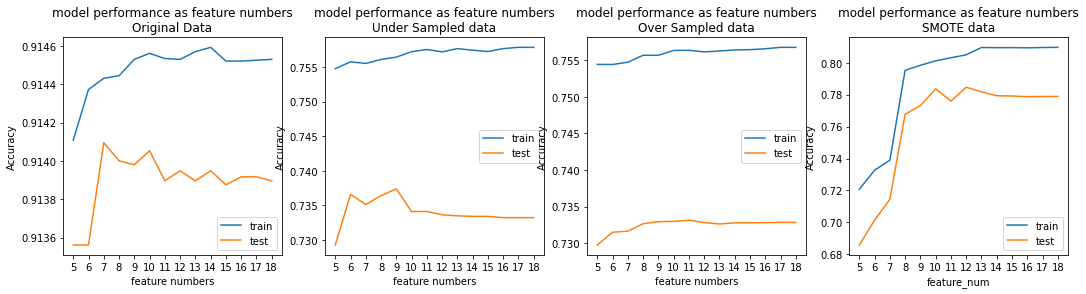

In [147]:
plt.subplots(1, 4, figsize=(18,4))

 # original data plot
plt.subplot(1, 4, 1)
plt.plot(feature_num,train_scores_original_rfe,label = 'train')
plt.plot(feature_num,test_scores_original_rfe,label = 'test')
plt.xticks(feature_num)
plt.xlabel("feature numbers")
plt.ylabel("Accuracy")
plt.title("model performance as feature numbers\nOriginal Data")
plt.legend()

 # under sampled data plot
plt.subplot(1, 4, 2)
plt.plot(feature_num,train_scores_under_rfe,label = 'train')
plt.plot(feature_num,test_scores_under_rfe,label = 'test')
plt.xticks(feature_num)
plt.xlabel("feature numbers")
plt.ylabel("Accuracy")
plt.title("model performance as feature numbers\nUnder Sampled data")
plt.legend()

 # over sampled data plot
plt.subplot(1, 4, 3)
plt.plot(feature_num,train_scores_over_rfe,label = 'train')
plt.plot(feature_num,test_scores_over_rfe,label = 'test')
plt.xticks(feature_num)
plt.xlabel("feature numbers")
plt.ylabel("Accuracy")
plt.title("model performance as feature numbers\nOver Sampled data")
plt.legend()

 # SMOTE data plot
plt.subplot(1, 4, 4)
plt.plot(feature_num,train_scores_smote_rfe,label = 'train')
plt.plot(feature_num,test_scores_smote_rfe,label = 'test')
plt.xticks(feature_num)
plt.xlabel("feature_num")
plt.ylabel("Accuracy")
plt.title("model performance as feature numbers\nSMOTE data")
plt.legend()

plt.show()

From above, the test score got improved at k=7 for original data, and it got lower after that. For under sampled data, test score got improved at k=9, and the score is the highest. For SMOTE data, it looks like k=10 is the best. Last, it's pretty much flat for entire k number for over sampled data, but it looks like the test score at k=11 is the highest. Therefore, I'll use k=7 for original data, k=9 for under sampled data, k=11 for over sampled data and k=10 for SMOTE data.

In [141]:
# RFE : Original data final

scaler = StandardScaler()
scaler.fit(X_train_original)
X_scaled_train = scaler.transform(X_train_original)
X_scaled_test = scaler.transform(X_test_original)

rfe_original = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=7)
rfe_original.fit(X_scaled_train,y_train_original)
    
train_score_or_rfe = rfe_original.score(X_scaled_train,y_train_original)
test_score_or_rfe = rfe_original.score(X_scaled_test,y_test_original)

In [142]:
# RFE : Under sampled data final

scaler = StandardScaler()
scaler.fit(X_train_under)
X_scaled_train = scaler.transform(X_train_under)
X_scaled_test = scaler.transform(X_test_sampled)
   
rfe_under = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=9)
rfe_under.fit(X_scaled_train,y_train_under)
    
train_score_u_rfe = rfe_under.score(X_scaled_train,y_train_under)
test_score_u_rfe = rfe_under.score(X_scaled_test,y_test_sampled)

In [143]:
# RFE : Over sampled data final

scaler = StandardScaler()
scaler.fit(X_train_over)
X_scaled_train = scaler.transform(X_train_over)
X_scaled_test = scaler.transform(X_test_sampled)
   
rfe_over = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=11)
rfe_over.fit(X_scaled_train,y_train_over)
    
train_score_ov_rfe = rfe_over.score(X_scaled_train,y_train_over)
test_score_ov_rfe = rfe_over.score(X_scaled_test,y_test_sampled)

In [144]:
# RFE : SMOTE data final

scaler = StandardScaler()
scaler.fit(X_train_smote)
X_scaled_train = scaler.transform(X_train_smote)
X_scaled_test = scaler.transform(X_test_smote)
    
rfe_smote = RFE(estimator=LogisticRegression(max_iter=1500, random_state=42), n_features_to_select=10)
rfe_smote.fit(X_scaled_train,y_train_smote)
    
train_score_s_rfe = rfe_smote.score(X_scaled_train,y_train_smote)
test_score_s_rfe = rfe_smote.score(X_scaled_test,y_test_smote)

In [145]:
# each datasets' final accuracy scores

data = ["Original data", "Under Sampled Data", "Over Sampled Data", "SMOTE Data"]
train_scores_rfe = [train_score_or_rfe, train_score_u_rfe, train_score_ov_rfe, train_score_s_rfe]
test_scores_rfe = [test_score_or_rfe, test_score_u_rfe, test_score_ov_rfe, test_score_s_rfe]

for index in range(len(data)):
    print(f"{data[index]} : Train Score {train_scores_rfe[index]*100: .3f}%, Test Score {test_scores_rfe[index]*100: .3f}%, \n")

Original data : Train Score  91.443%, Test Score  91.409%, 

Under Sampled Data : Train Score  75.646%, Test Score  73.739%, 

Over Sampled Data : Train Score  75.634%, Test Score  73.314%, 

SMOTE Data : Train Score  80.122%, Test Score  78.368%, 



### RFECV

In [153]:
# RFECV
# Original data
from sklearn.feature_selection import RFECV

scaler = StandardScaler()
scaler.fit(X_train_original)
X_scaled_train = scaler.transform(X_train_original)
X_scaled_test = scaler.transform(X_test_original)

estimator = LogisticRegression(max_iter=1000, random_state=42)
selector_original = RFECV(estimator, min_features_to_select=5, cv=5)
selector_original = selector_original.fit(X_scaled_train,y_train_original)

train_score_or_rfecv = selector_original.score(X_scaled_train,y_train_original)
test_score_or_rfecv = selector_original.score(X_scaled_test,y_test_original)
print(f"Train Score {train_score_or_rfecv*100: .3f}%, Test Score {test_score_or_rfecv*100: .3f}%\n")

result_original = pd.DataFrame(selector_original.get_support(), index=X_train_original.columns.values, columns=['False: dropped'])
result_original['ranking'] = selector_original.ranking_
print(f"{result_original}\n\nThe number of columns left:{len(selector_original.get_feature_names_out())}")

Train Score  91.457%, Test Score  91.390%

                                     False: dropped  ranking
BMI                                            True        1
Smoking                                        True        1
AlcoholDrinking                                True        1
PhysicalHealth                                False        3
MentalHealth                                   True        1
DiffWalking                                    True        1
Sex                                            True        1
AgeCategory                                    True        1
PhysicalActivity                              False        6
GenHealth                                      True        1
SleepTime                                     False        2
Asthma                                         True        1
Race_American Indian/Alaskan Native            True        1
Race_Asian                                     True        1
Race_Black                                

In [154]:
# RFECV
# Under sampled data
scaler = StandardScaler()
scaler.fit(X_train_under)
X_scaled_train = scaler.transform(X_train_under)
X_scaled_test = scaler.transform(X_test_sampled)

estimator = LogisticRegression(max_iter=1000, random_state=42)
selector_under = RFECV(estimator, min_features_to_select=5, cv=5)
selector_under = selector_under.fit(X_scaled_train,y_train_under)

train_score_u_rfecv = selector_under.score(X_scaled_train,y_train_under)
test_score_u_rfecv = selector_under.score(X_scaled_test,y_test_sampled)
print(f"Train Score {train_score_u_rfecv*100: .3f}%, Test Score {test_score_u_rfecv*100: .3f}%\n")

result_under = pd.DataFrame(selector_under.get_support(), index=X_train_under.columns.values, columns=['False: dropped'])
result_under['ranking'] = selector_under.ranking_
print(f"{result_under}\n\nThe number of columns left:{len(selector_under.get_feature_names_out())}")

Train Score  75.769%, Test Score  73.323%

                                     False: dropped  ranking
BMI                                            True        1
Smoking                                        True        1
AlcoholDrinking                                True        1
PhysicalHealth                                 True        1
MentalHealth                                   True        1
DiffWalking                                    True        1
Sex                                            True        1
AgeCategory                                    True        1
PhysicalActivity                               True        1
GenHealth                                      True        1
SleepTime                                      True        1
Asthma                                         True        1
Race_American Indian/Alaskan Native            True        1
Race_Asian                                     True        1
Race_Black                                

In [155]:
# RFECV
# Over sampled data

scaler = StandardScaler()
scaler.fit(X_train_over)
X_scaled_train = scaler.transform(X_train_over)
X_scaled_test = scaler.transform(X_test_sampled)

estimator = LogisticRegression(max_iter=1000, random_state=42)
selector_over = RFECV(estimator, min_features_to_select=5, cv=5)
selector_over = selector_over.fit(X_scaled_train,y_train_over)

train_score_ov_rfecv = selector_over.score(X_scaled_train,y_train_over)
test_score_ov_rfecv = selector_over.score(X_scaled_test,y_test_sampled)
print(f"Train Score {train_score_ov_rfecv*100: .3f}%, Test Score {test_score_ov_rfecv*100: .3f}%\n")

result_over = pd.DataFrame(selector_over.get_support(), index=X_train_over.columns.values, columns=['False: dropped'])
result_over['ranking'] = selector_over.ranking_
print(f"{result_over}\n\nThe number of columns left:{len(selector_over.get_feature_names_out())}")

Train Score  75.675%, Test Score  73.285%

                                     False: dropped  ranking
BMI                                            True        1
Smoking                                        True        1
AlcoholDrinking                                True        1
PhysicalHealth                                 True        1
MentalHealth                                   True        1
DiffWalking                                    True        1
Sex                                            True        1
AgeCategory                                    True        1
PhysicalActivity                               True        1
GenHealth                                      True        1
SleepTime                                      True        1
Asthma                                         True        1
Race_American Indian/Alaskan Native            True        1
Race_Asian                                     True        1
Race_Black                                

In [156]:
# RFECV
# SMOTE data
scaler = StandardScaler()
scaler.fit(X_train_smote)
X_scaled_train = scaler.transform(X_train_smote)
X_scaled_test = scaler.transform(X_test_smote)

estimator = LogisticRegression(max_iter=2000, random_state=42)
selector_smote = RFECV(estimator, min_features_to_select=5, cv=5)
selector_smote = selector_smote.fit(X_scaled_train,y_train_smote)

train_score_s_rfecv = selector_smote.score(X_scaled_train,y_train_smote)
test_score_s_rfecv = selector_smote.score(X_scaled_test,y_test_smote)
print(f"Train Score {train_score_s_rfecv*100: .3f}%, Test Score {test_score_s_rfecv*100: .3f}%\n")

result_smote = pd.DataFrame(selector_smote.get_support(), index=X_train_smote.columns.values, columns=['False: dropped'])
result_smote['ranking'] = selector_smote.ranking_
print(f"{result_smote}\n\nThe number of columns left:{len(selector_smote.get_feature_names_out())}")

Train Score  80.946%, Test Score  77.934%

                                     False: dropped  ranking
BMI                                            True        1
Smoking                                       False        5
AlcoholDrinking                                True        1
PhysicalHealth                                False        2
MentalHealth                                  False        4
DiffWalking                                    True        1
Sex                                            True        1
AgeCategory                                    True        1
PhysicalActivity                               True        1
GenHealth                                      True        1
SleepTime                                     False        3
Asthma                                         True        1
Race_American Indian/Alaskan Native            True        1
Race_Asian                                     True        1
Race_Black                                

In [157]:
# accuracy scores for all datasets and all feature selecting methods

data = ["Original data", "Under Sampled Data", "Over Sampled Data", "SMOTE Data"]
train_scores_kbest
test_scores_kbest
train_scores_rfe
test_scores_rfe
train_scores_rfecv = [train_score_or_rfecv, train_score_u_rfecv, train_score_ov_rfecv, train_score_s_rfecv]
test_scores_rfecv = [test_score_or_rfecv, test_score_u_rfecv, test_score_ov_rfecv, test_score_s_rfecv]

for index in range(len(data)):
    print(f"{data[index]}")
    print(f"SelectKBest: Train score {train_scores_kbest[index]*100: .3f}%, Test score {test_scores_kbest[index]*100: .3f}%")
    print(f"RFE".ljust(11) + f": Train score {train_scores_rfe[index]*100: .3f}%, Test score {test_scores_rfe[index]*100: .3f}%")
    print(f"RFECV".ljust(11) + f": Train score {train_scores_rfecv[index]*100: .3f}%, Test score {test_scores_rfecv[index]*100: .3f}%\n")

Original data
SelectKBest: Train score  91.418%, Test score  91.391%
RFE        : Train score  91.443%, Test score  91.409%
RFECV      : Train score  91.457%, Test score  91.390%

Under Sampled Data
SelectKBest: Train score  75.528%, Test score  73.273%
RFE        : Train score  75.646%, Test score  73.739%
RFECV      : Train score  75.769%, Test score  73.323%

Over Sampled Data
SelectKBest: Train score  75.469%, Test score  73.334%
RFE        : Train score  75.634%, Test score  73.314%
RFECV      : Train score  75.675%, Test score  73.285%

SMOTE Data
SelectKBest: Train score  80.928%, Test score  77.918%
RFE        : Train score  80.122%, Test score  78.368%
RFECV      : Train score  80.946%, Test score  77.934%



In [158]:
# accuracy score before feature selecting
before_selection

,Original,Under Sampled,Over Sampled,SMOTE
Train score,91.452915,75.787020,75.675365,80.968618
Test score,91.389649,73.322747,73.284094,77.891185


From those results, most of the feature selecting methods improved accuracy score for all datasets. And the RFE got the highest test score for mostly everything. Therefore, I'll use RFE for feature selection. I'm going to use the dataframe below for modeling.

In [58]:
# selected features of original data
X_train_original.loc[:, rfe_original.support_]

,BMI,Smoking,DiffWalking,Sex,AgeCategory,GenHealth,Asthma
176993,27.12,1,0,1,35,3,0
267593,30.23,0,0,0,18,2,0
175707,32.55,0,0,1,60,3,0
317039,33.07,0,0,0,55,3,0
262926,23.06,0,0,1,30,4,0
...,...,...,...,...,...,...,...
119879,26.62,0,0,0,40,4,0
259178,25.04,0,0,1,25,4,0
131932,36.05,0,0,0,18,1,0
146867,27.44,0,0,0,40,3,0


In [61]:
# selected features of under sampled data
X_train_under.loc[:, rfe_under.support_]

,Smoking,AlcoholDrinking,PhysicalHealth,DiffWalking,Sex,AgeCategory,GenHealth,Asthma,Race_Asian
0,1,0,0.0,0,1,65,1,0,0
1,0,0,5.0,0,0,80,0,0,0
2,0,0,0.0,0,0,40,4,0,0
3,0,0,7.0,1,0,60,2,0,0
4,1,0,0.0,0,1,70,3,0,0
...,...,...,...,...,...,...,...,...,...
38177,0,0,0.0,0,1,75,3,0,0
38178,0,0,30.0,1,0,50,0,0,0
38179,0,0,0.0,0,0,75,2,0,0
38180,1,0,15.0,0,1,70,3,0,0


In [63]:
# selected features of over sampled data
X_train_over.loc[:, rfe_over.support_]

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,GenHealth,Asthma,Race_Asian
0,27.12,1,0,0.0,2.0,0,1,35,3,0,0
1,30.23,0,0,0.0,0.0,0,0,18,2,0,0
2,32.55,0,0,0.0,0.0,0,1,60,3,0,0
3,33.07,0,0,0.0,0.0,0,0,55,3,0,0
4,23.06,0,0,0.0,0.0,0,1,30,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
408515,42.87,0,0,30.0,0.0,1,0,60,2,0,0
408516,24.41,0,0,0.0,0.0,0,1,65,2,0,0
408517,33.00,0,0,0.0,0.0,0,1,60,1,0,0
408518,31.32,1,0,3.0,2.0,0,0,65,2,1,0


In [64]:
# selected features of SMOTE data
X_train_smote.loc[:, rfe_smote.support_]

,AlcoholDrinking,AgeCategory,GenHealth,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,35,3,0,0,0,0,0,0,1
1,0,18,2,0,0,0,0,1,0,0
2,0,60,3,0,0,0,0,0,0,1
3,0,55,3,0,0,0,0,1,0,0
4,0,30,4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
408515,0,80,1,0,0,0,0,0,0,1
408516,0,65,3,0,0,0,0,0,0,1
408517,0,70,2,0,0,0,0,0,0,0
408518,0,75,2,0,0,0,0,0,0,1


## Baseline Modeling & Evaluation

### Original data set

Original data
train score: 91.44306495157846
test score: 91.40949833893984
 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87544
           1       0.48      0.07      0.12      8178

    accuracy                           0.91     95722
   macro avg       0.70      0.53      0.54     95722
weighted avg       0.88      0.91      0.88     95722



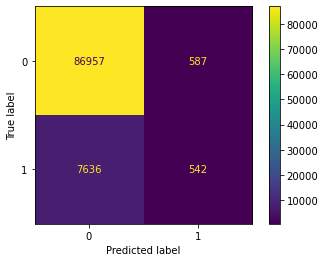

In [164]:
# Create a logistic regression model with original dataset
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
scaler.fit(X_train_original.loc[:, rfe_original.support_])
X_scaled_train = scaler.transform(X_train_original.loc[:, rfe_original.support_])
X_scaled_test = scaler.transform(X_test_original.loc[:, rfe_original.support_])
    
model_original = LogisticRegression(max_iter=1000, random_state=42)
model_original.fit(X_scaled_train,y_train_original)

print("Original data")
print(f"train score: {model_original.score(X_scaled_train,y_train_original)*100}")
print(f"test score: {model_original.score(X_scaled_test,y_test_original)*100}\n ")


# Evaluation(precision & Recall)
from sklearn.metrics import classification_report

y_pred = model_original.predict(X_scaled_test)

report_initial = classification_report(y_test_original, y_pred)
print(report_initial)


# Create confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_original, X_scaled_test, y_test_original)

The accuracy score for the original dataset was over 91% for the test set. However, precision and recall were very low. The precision score was 0.48, indicating that half of the positive result from the prediction are false positives. The recall score was 0.07, meaning that most of the person who has heart disease was predicted as negative. I’m working on this project for people who cannot afford to see a doctor every time, to urge them to go see a doctor or not to waste their money on unnecessary things. Therefore, achieving a better recall score and precision score is both crucial. However, around 90% of the original data consists of non-heart disease cases, leading to overfitting of the model.

### Under sampled dataset

Under sampled data
train score: 75.64559216384684
test score: 73.73853450617412
 
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     87544
           1       0.21      0.78      0.34      8178

    accuracy                           0.74     95722
   macro avg       0.59      0.76      0.59     95722
weighted avg       0.91      0.74      0.79     95722



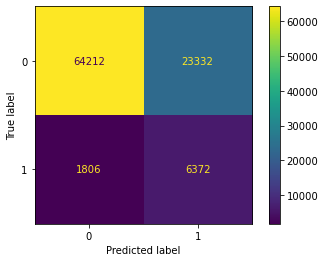

In [167]:
scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
    
model_under = LogisticRegression(max_iter=1000, random_state=42)
model_under.fit(X_scaled_train,y_train_under)

print("Under sampled data")
print(f"train score: {model_under.score(X_scaled_train,y_train_under)*100}")
print(f"test score: {model_under.score(X_scaled_test,y_test_sampled)*100}\n ")


# Evaluation(precision & Recall)
y_pred = model_under.predict(X_scaled_test)

report_initial = classification_report(y_test_sampled, y_pred)
print(report_initial)


# Create confusion matrix
ConfusionMatrixDisplay.from_estimator(model_under, X_scaled_test, y_test_sampled)

The accuracy of both the train and test sets is lower than that of the original data. However, since this dataset is sampled on the train set and not on imbalance data, I consider it to be better than the original dataset model.In this model, the recall score improved compared to the original data model, but the precision score decreased. This means there are many false positives, which means that many people who do not have heart disease were predicted as positive.

### Over sampled dataset

Over sampled data
train score: 75.63448545970822
test score: 73.31438958651094
 
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87544
           1       0.21      0.79      0.33      8178

    accuracy                           0.73     95722
   macro avg       0.59      0.76      0.58     95722
weighted avg       0.91      0.73      0.79     95722



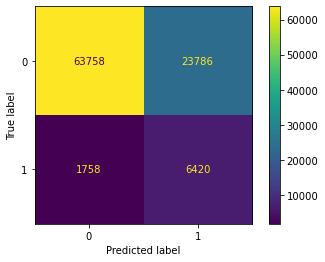

In [169]:
scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
    
model_over = LogisticRegression(max_iter=1000, random_state=42)
model_over.fit(X_scaled_train,y_train_over)

print("Over sampled data")
print(f"train score: {model_over.score(X_scaled_train,y_train_over)*100}")
print(f"test score: {model_over.score(X_scaled_test,y_test_sampled)*100}\n ")


# Evaluation(precision & Recall)
y_pred = model_over.predict(X_scaled_test)

report_initial = classification_report(y_test_sampled, y_pred)
print(report_initial)


# Create confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_scaled_test, y_test_sampled)

The over sampled data got almost the same results as the under sampled data. Therefore, it's better than the original data model but still not good enough precision score.

### SMOTE dataset

SMOTE data
train score: 80.12165867032213
test score: 78.36756440525689
 
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     87544
           1       0.22      0.61      0.32      8178

    accuracy                           0.78     95722
   macro avg       0.59      0.70      0.60     95722
weighted avg       0.89      0.78      0.82     95722



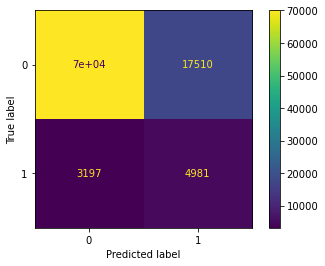

In [171]:
scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_smote.loc[:, rfe_smote.support_])
    
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_scaled_train,y_train_over)

print("SMOTE data")
print(f"train score: {model_smote.score(X_scaled_train,y_train_smote)*100}")
print(f"test score: {model_smote.score(X_scaled_test,y_test_smote)*100}\n ")


# Evaluation(precision & Recall)
y_pred = model_smote.predict(X_scaled_test)

report_initial = classification_report(y_test_smote, y_pred)
print(report_initial)


# Create confusion matrix
ConfusionMatrixDisplay.from_estimator(model_smote, X_scaled_test, y_test_smote)

The accuracy of SMOTE data is the highest among the sampled datasets. However, the precision score is as low as the other sampled datasets. Additionally, the recall score is lower than the other datasets.

From those results, I consider the original dataset doesn't work well for this prediction. And I'll check how those datasets work with best hyperparameters.